## HA02-4
### Create a 1/M-pot and estimate point of criticality ###

To run this notebook you need to use a computer which has Jupyter installed. You can run it from all computers in the computer labs at Ångström. If you prefere to use our own computer the easiest way to install Jupyter is to use the [Anaconda](https://www.anaconda.com/distribution/) platform.

When approaching criticality the operator can make a 1/M-plot to estimate how close to criticality the reactor is. In this exercise you will use data obtained at the [TRIGA](http://www.rcp.ijs.si/ric/index-a.htm) reactor of the Josef Stefan Institute in Ljubliana to do this. The data includes the step changes in reactivity made by the operator and detector signals in counts per seconds from two detectors. The figure below show the core of the reactor. The detectors are positioned at F8 and F27, respectivly and the neutron source is situated at F9. After each step the opterator calculates how far from criticality the reactor is. For the proceeding step the maximum change in reactivity alowed is half of what is left to reach criticality.

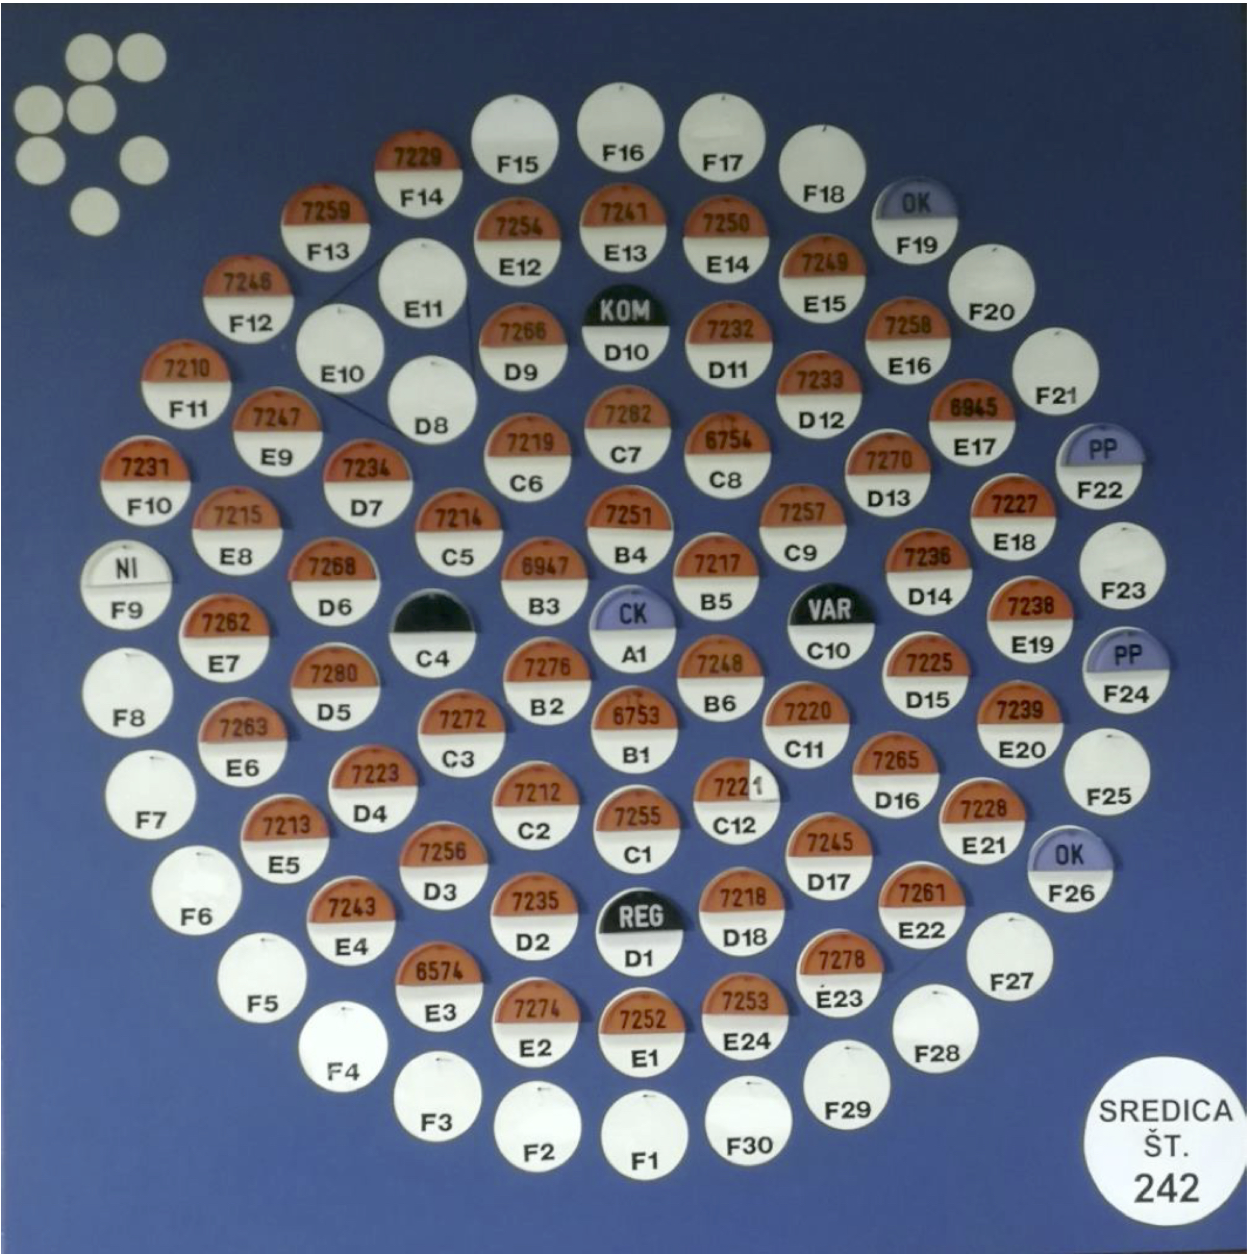

# Exercise
Make an 1/M-plot for the two detectors and estimate how far from criticality the reactor is after the last step. What is the maximum allowed change of reactivity in the next step? What is the difference in the behaviour of the two detectors and why? Which would you trust if you were an operator?

Hint: Look at the numpy functions polyfit and poly1d.

In [4]:
import numpy as np # We can now use numpy functions calling np
import matplotlib.pyplot as plt # We can now use matplotlib functions calling plt

In [5]:
# Load data
Delta_rho = [0,1539,3024,2331,2010,419]
F8 = [7.93,8.75,12.06,16.27,46.3,81.83]
F27 = [1.79,2.14,3.61,6.45,21.45,37.53]

# Solution

In [11]:
rho = np.cumsum(Delta_rho)
Minv8=np.divide(7.93,F8)
Minv27=np.divide(1.79,F27)

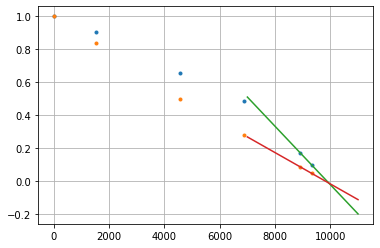

In [44]:
p8=np.polyfit(rho[-2:],Minv8[-2:], deg=1)
fit8=np.poly1d(p8)
p27=np.polyfit(rho[-3:],Minv27[-3:], deg=1)
fit27=np.poly1d(p27)
rhofit=np.linspace(0,11000,11000)
plt.plot(rho,Minv8,'.')
plt.plot(rho,Minv27,'.')
plt.plot(rhofit[-4000:],fit8(rhofit[-4000:]),'-')
plt.plot(rhofit[-4000:],fit27(rhofit[-4000:]),'-')
plt.grid()

In [62]:
print('According to F8 criticality is reached by adding',round(-p8[1]/p8[0]-rho[5]),'pcm')
print('According to F27 criticality is reached by adding',round(-p27[1]/p27[0]-rho[5]),'pcm')


According to F8 criticality is reached by adding 546.0 pcm
According to F27 criticality is reached by adding 481.0 pcm


Extrapolating using two points in the middle of the plot show that F8 is unreliable for low fluxes. This beacus it is dominated by neutrons from the source.

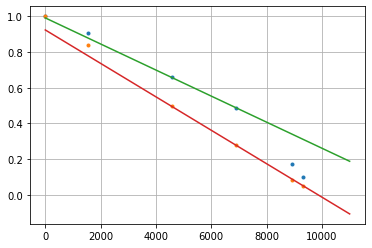

In [71]:
p8=np.polyfit(rho[2:4],Minv8[2:4], deg=1)
fit8=np.poly1d(p8)
p27=np.polyfit(rho[2:4],Minv27[2:4], deg=1)
fit27=np.poly1d(p27)
rhofit=np.linspace(0,11000,11000)
plt.plot(rho,Minv8,'.')
plt.plot(rho,Minv27,'.')
plt.plot(rhofit,fit8(rhofit),'-')
plt.plot(rhofit,fit27(rhofit),'-')
plt.grid()